In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.preprocessing import OrdinalEncoder,StandardScaler 
from sklearn.model_selection import train_test_split,cross_val_score, KFold
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
import xgboost as xgb

from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
#Data set source
# https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

In [3]:
df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


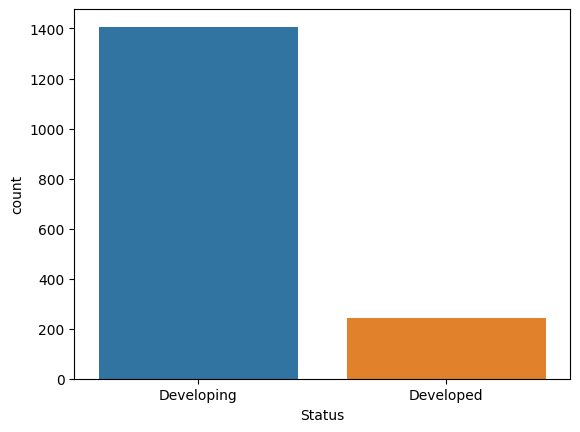

In [7]:

#Checking the count of the categories to which theses counries belong to.
sn.countplot(x='Status',data=df)
plt.show()

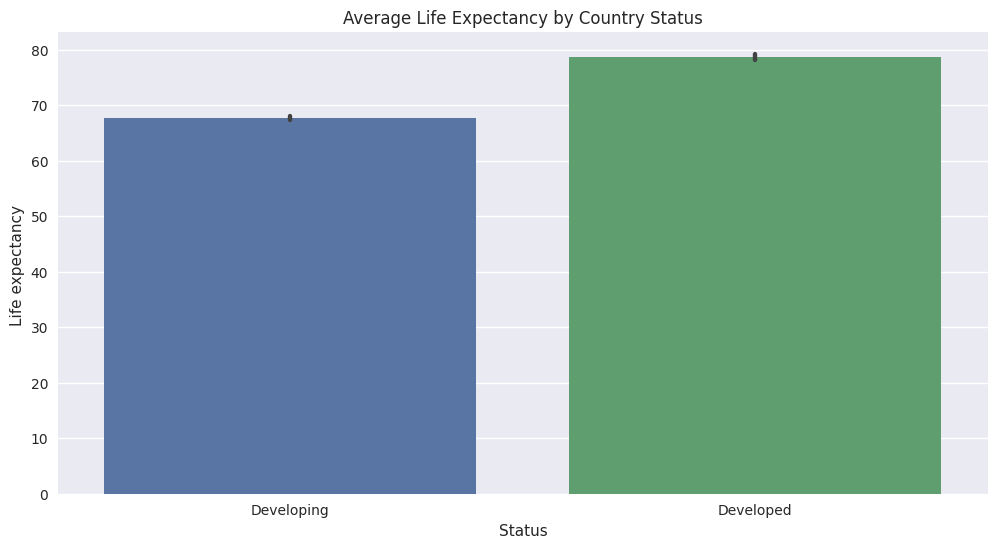

In [14]:
plt.figure(figsize=(12, 6))
sn.barplot(x='Status', y='Life expectancy ', data=df)
plt.title('Average Life Expectancy by Country Status')
plt.show()

#### **Pair plot of Life Expectancy,GDP,Mortality**

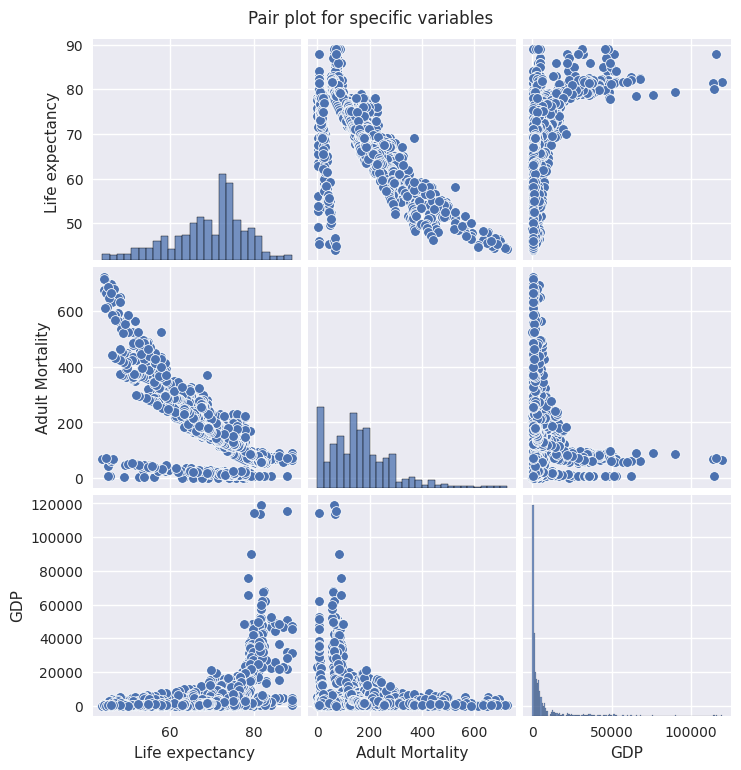

In [17]:
#Pair plot for the Life expectancy,etc.
sn.pairplot(df[['Life expectancy ', 'Adult Mortality', 'GDP']])
plt.suptitle('Pair plot for specific variables', y=1.02)
plt.show()


In [16]:
plt.savefig('parplot.png')

<Figure size 800x550 with 0 Axes>

#### **Average life expectancy by year**

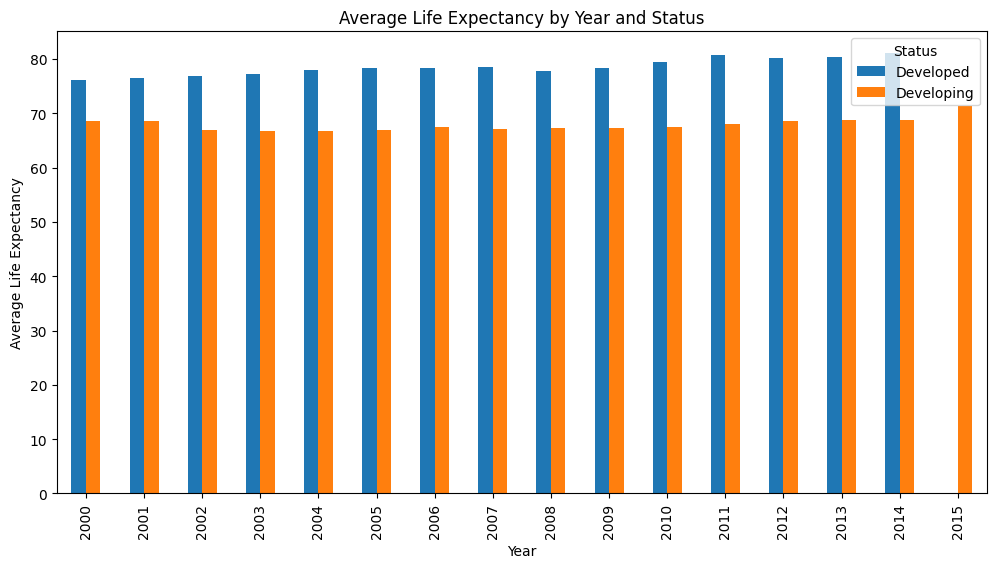

In [10]:
#Average life expectancy by year 
df_grouped = df.groupby(['Year', 'Status'])['Life expectancy '].mean().unstack()
df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Life Expectancy by Year and Status')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Status')
plt.show()

#### **Polio Vaccination Rate vs Life Expectancy\nColor and Size indicate Infant Deaths**


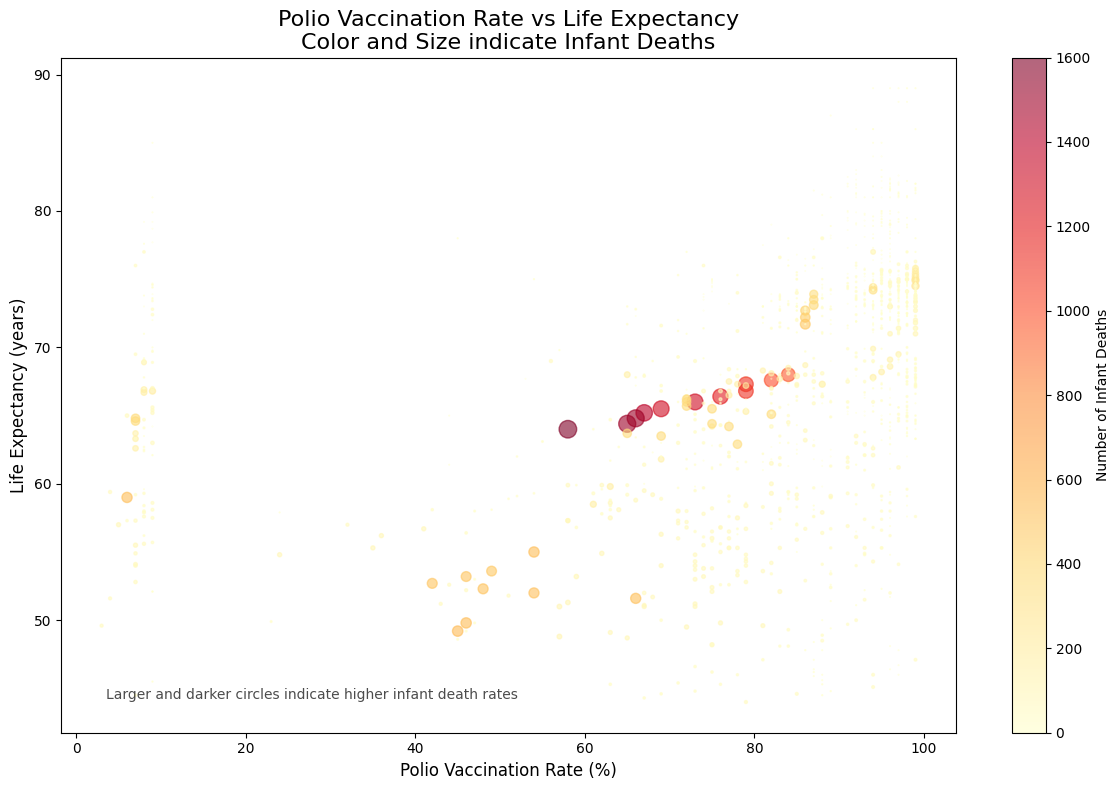

In [11]:


plt.figure(figsize=(12, 8))

scatter = plt.scatter(df['Polio'], df['Life expectancy '], 
                      c=df['infant deaths'], s=df['infant deaths']/10,
                      cmap='YlOrRd', alpha=0.6)

plt.title('Polio Vaccination Rate vs Life Expectancy\nColor and Size indicate Infant Deaths', fontsize=16)
plt.xlabel('Polio Vaccination Rate (%)', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label('Number of Infant Deaths', fontsize=10)

plt.text(0.05, 0.05, 
         'Larger and darker circles indicate higher infant death rates', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         alpha=0.7)

plt.tight_layout()
plt.show()


#### **Life Expectancy with Schooling Years**

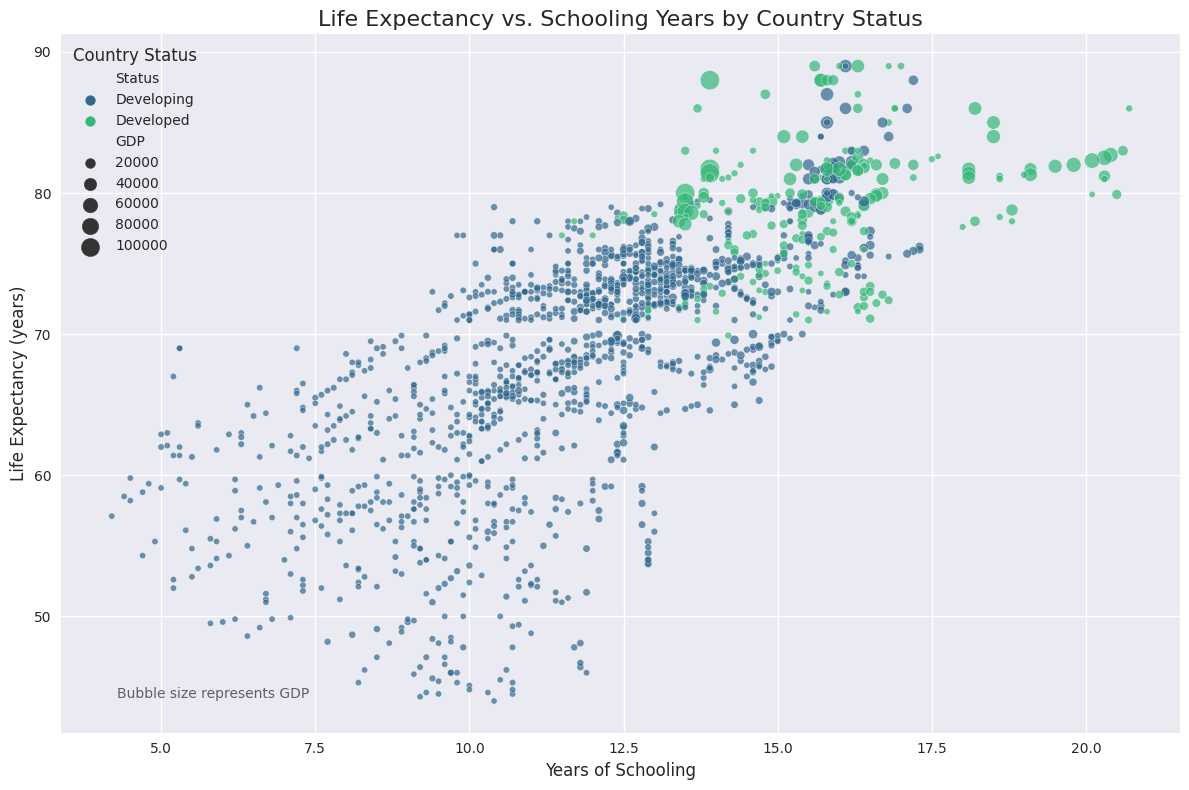

In [12]:


plt.style.use('seaborn')

plt.figure(figsize=(12, 8))
sn.scatterplot(data=df, x='Schooling', y='Life expectancy ', hue='Status', 
                palette='viridis', size='GDP', sizes=(20, 200), alpha=0.7)

plt.title('Life Expectancy vs. Schooling Years by Country Status', fontsize=16)
plt.xlabel('Years of Schooling', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

plt.legend(title='Country Status', title_fontsize='12', fontsize='10')

plt.text(0.05, 0.05, 
         'Bubble size represents GDP', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         alpha=0.7)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

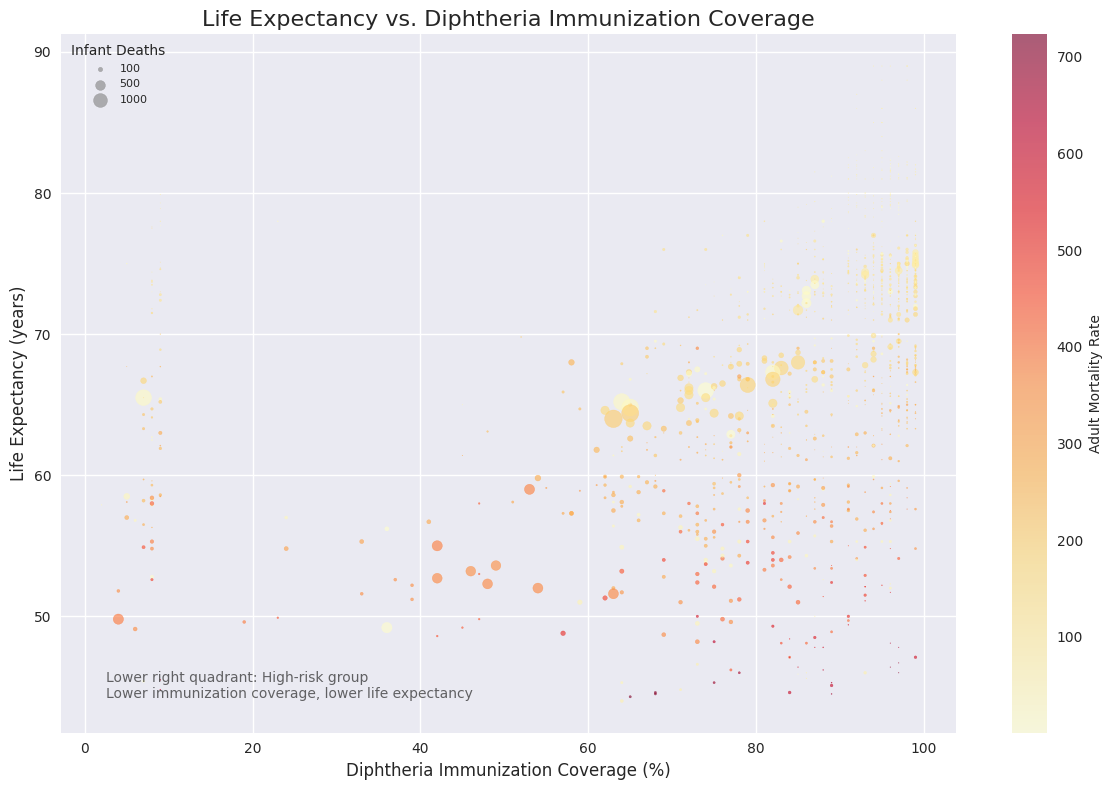

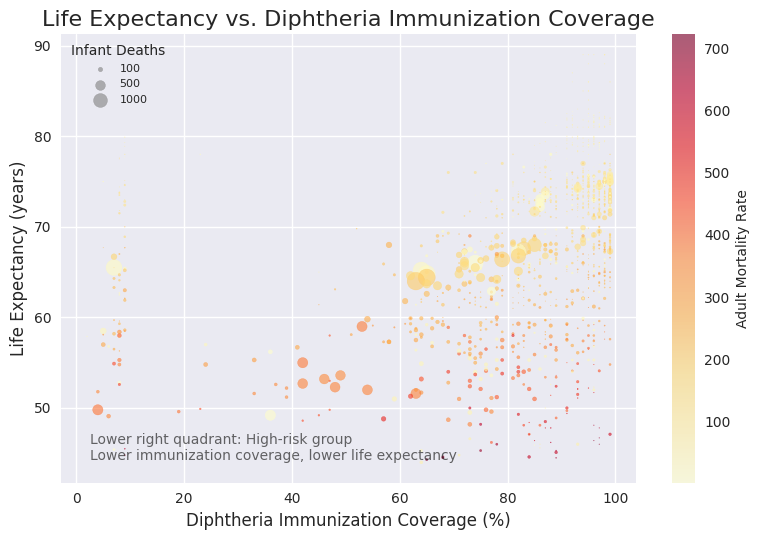

In [44]:


plt.figure(figsize=(12, 8))


plt.figure(figsize=(12, 8))

scatter = plt.scatter(df['Diphtheria '], df['Life expectancy '], 
                      c=df['Adult Mortality'], s=df['infant deaths']/10,
                      cmap='YlOrRd', alpha=0.6)

plt.title('Life Expectancy vs. Diphtheria Immunization Coverage', fontsize=16)
plt.xlabel('Diphtheria Immunization Coverage (%)', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label('Adult Mortality Rate', fontsize=10)

sizes = [100, 500, 1000]
labels = ['100', '500', '1000']
legend_elements = [plt.scatter([], [], s=size/10, c='gray', alpha=0.6, label=label) 
                   for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, title='Infant Deaths', 
           loc='upper left', title_fontsize=10, fontsize=8)

plt.text(0.05, 0.05, 
         'Lower right quadrant: High-risk group\nLower immunization coverage, lower life expectancy', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         alpha=0.7)

plt.tight_layout()
plt.show()
scatter = plt.scatter(df['Diphtheria '], df['Life expectancy '], 
                      c=df['Adult Mortality'], s=df['infant deaths']/10,
                      cmap='YlOrRd', alpha=0.6)

plt.title('Life Expectancy vs. Diphtheria Immunization Coverage', fontsize=16)
plt.xlabel('Diphtheria Immunization Coverage (%)', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label('Adult Mortality Rate', fontsize=10)

sizes = [100, 500, 1000]
labels = ['100', '500', '1000']
legend_elements = [plt.scatter([], [], s=size/10, c='gray', alpha=0.6, label=label) 
                   for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, title='Infant Deaths', 
           loc='upper left', title_fontsize=10, fontsize=8)

plt.text(0.05, 0.05, 
         'Lower right quadrant: High-risk group\nLower immunization coverage, lower life expectancy', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         alpha=0.7)

plt.tight_layout()
plt.show()


In [45]:


countries_less_than_5 = df[df['infant deaths'] < 5]

result = countries_less_than_5.groupby('Country').agg({
    'Status': 'first',  # Assuming status doesn't change for a country
    'GDP': 'mean',     
    'infant deaths': 'mean'  
}).reset_index()

result = result.sort_values('GDP', ascending=False)

print(result)




              Country      Status           GDP  infant deaths
41         Luxembourg   Developed  56727.492103       0.000000
49        Netherlands   Developed  39640.341955       1.000000
2           Australia   Developed  35391.195154       1.000000
3             Austria   Developed  33171.578263       0.000000
65             Sweden   Developed  32232.377078       0.000000
..                ...         ...           ...            ...
14            Comoros  Developing    679.454085       1.833333
66        Timor-Leste  Developing    679.216248       2.000000
28      Guinea-Bissau  Developing    425.470655       4.000000
70            Ukraine  Developing    372.186918       4.000000
20  Equatorial Guinea  Developing    192.597330       3.000000

[73 rows x 4 columns]


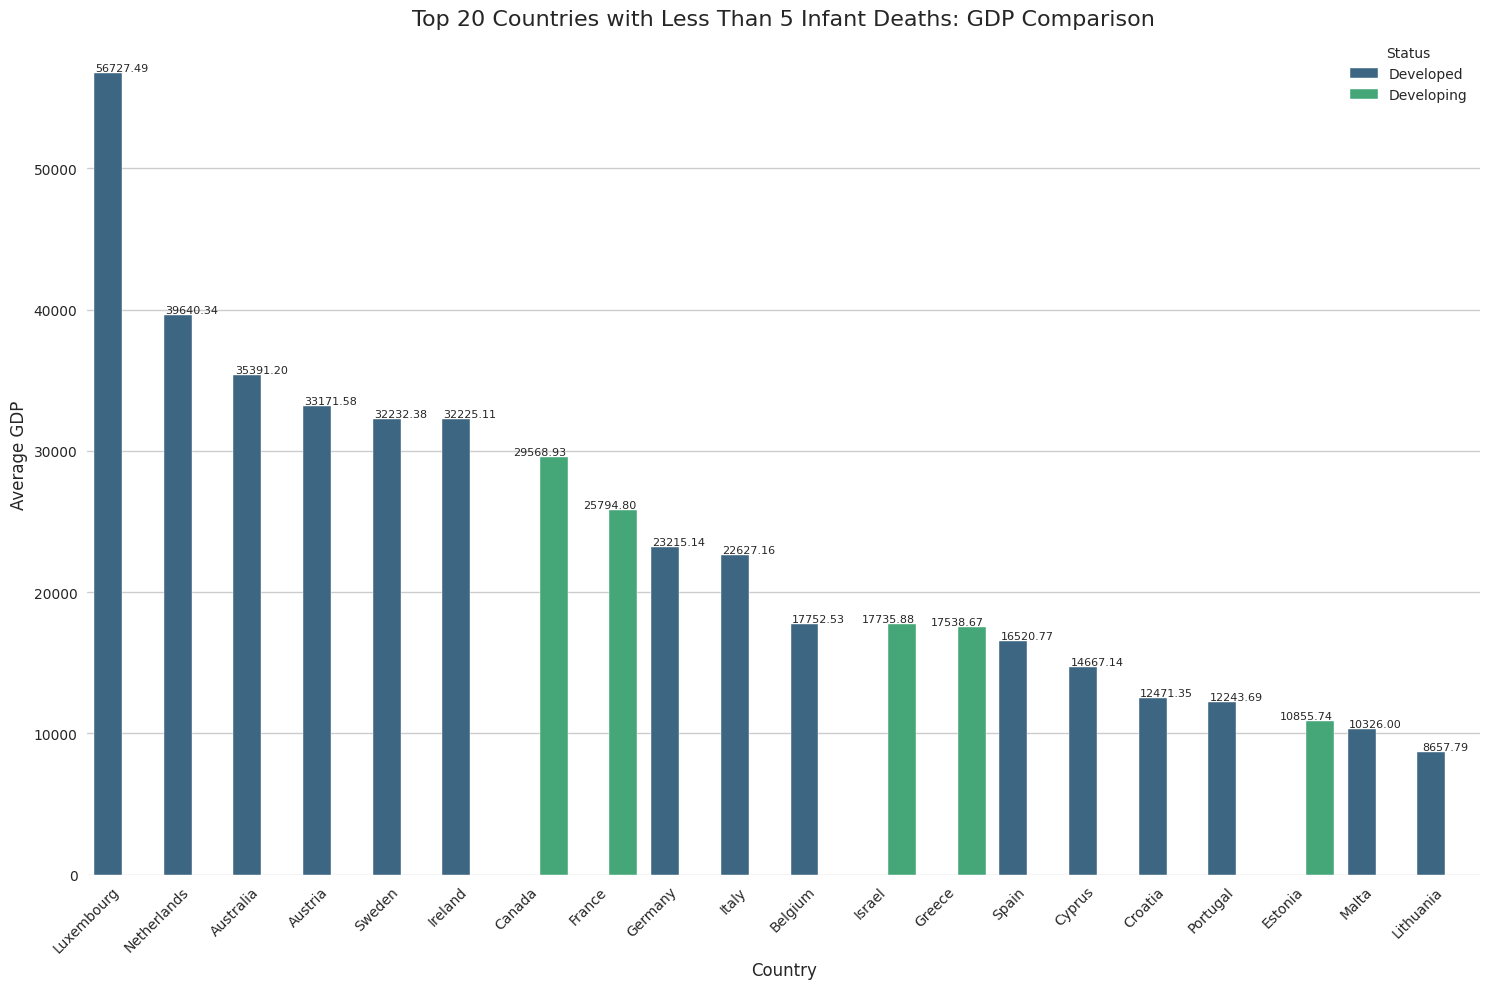

In [46]:


countries_less_than_5 = df[df['infant deaths'] < 5]

result = countries_less_than_5.groupby('Country').agg({
    'Status': 'first',  
    'GDP': 'mean',     
    'infant deaths': 'mean'  
}).reset_index()

result = result.sort_values('GDP', ascending=False)

plt.figure(figsize=(15, 10))
sn.set_style("whitegrid")

ax = sn.barplot(x='Country', y='GDP', hue='Status', data=result.head(20), palette='viridis')

plt.title('Top 20 Countries with Less Than 5 Infant Deaths: GDP Comparison', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average GDP', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(result['GDP'].head(20)):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()



### Feature Engineering

In [47]:
df.columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]
numeric_data.columns
numeric_columns = list(numeric_columns)
print(numeric_columns)

['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


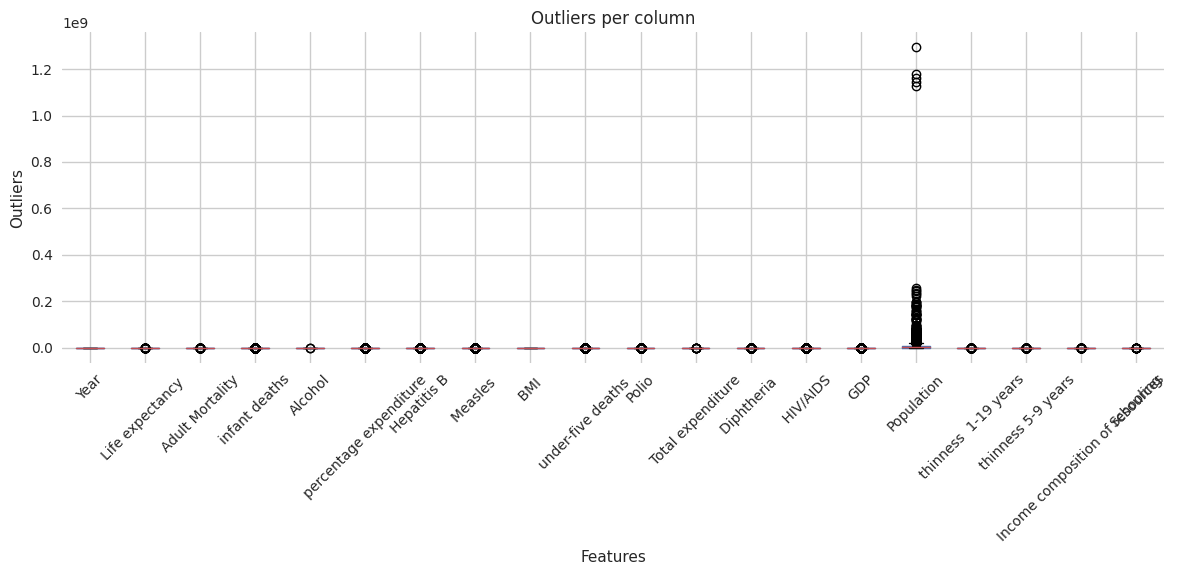

In [48]:
#Checking for any outliers
plt.figure(figsize=(12, 6))
df.boxplot(column=numeric_columns)
plt.title('Outliers per column')
plt.suptitle('')  # This removes the automatic suptitle
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
#Removing outliers from the numeric column Population


column_name = 'Population'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers from the specific column
df_clean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]


In [50]:

le = LabelEncoder()
df_clean['Status_encoded'] = le.fit_transform(df_clean['Status'])

df_encoded = pd.get_dummies(df_clean, columns=['Country'], prefix='Country')


print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 1 to 2937
Columns: 155 entries, Year to Country_Zimbabwe
dtypes: bool(133), float64(16), int64(5), object(1)
memory usage: 438.4+ KB
None


### Feature Selection

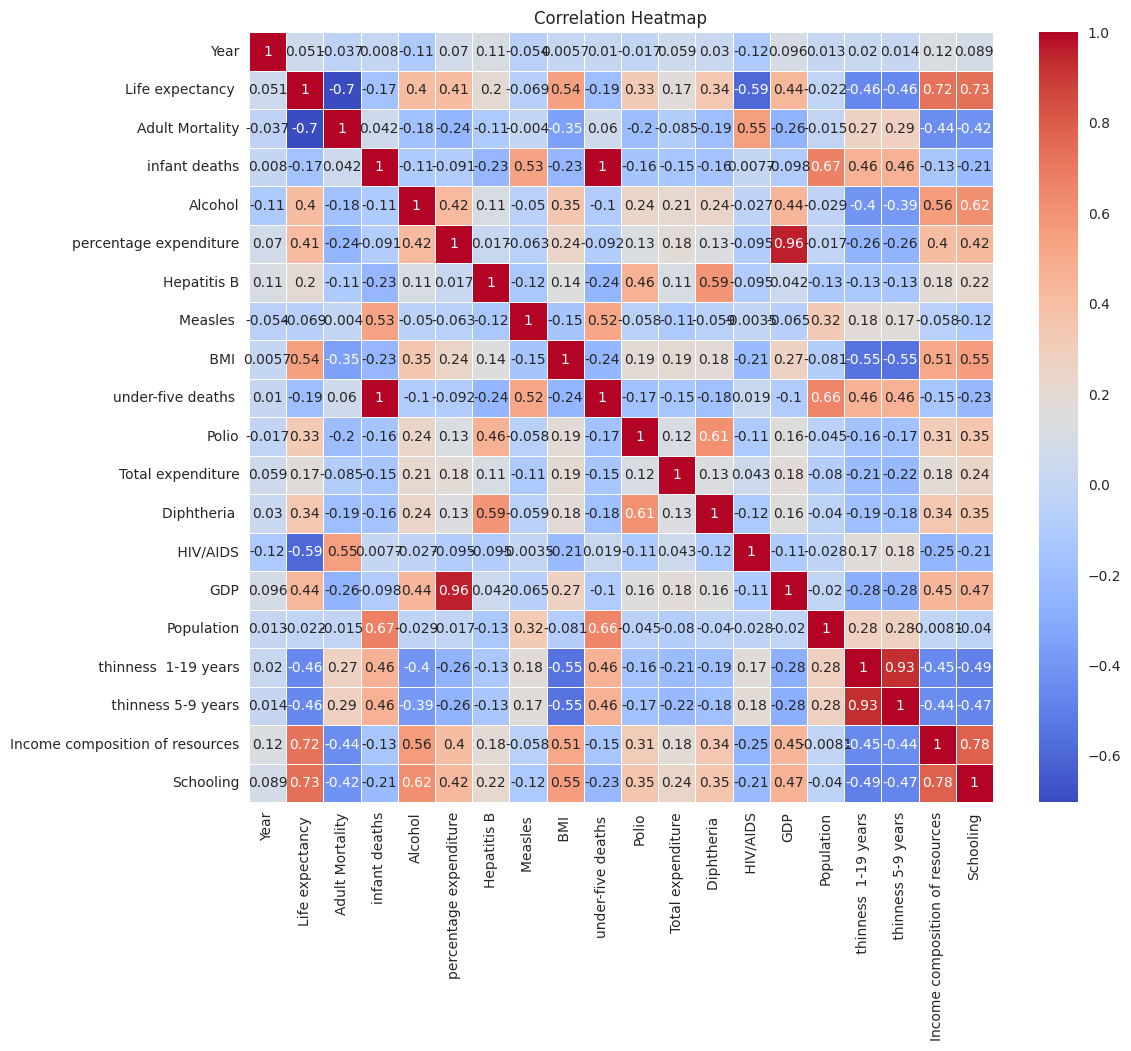

In [51]:
df_clean.columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [52]:
X = df_encoded[[' BMI ', 'GDP', 'Income composition of resources', 'Status_encoded']]
y  = df_encoded['Life expectancy ']

country_columns = [col for col in df_encoded.columns if col.startswith('Country_')]
X = pd.concat([X, df_encoded[country_columns]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Development

#### Implementing Random Forest Regresssor

Root Mean Squared Error: 2.517166296050347
R-squared Score: 0.9182465409937598

Top 10 Most Important Features:
                             feature  importance
2    Income composition of resources    0.748326
0                               BMI     0.068667
1                                GDP    0.041439
20                  Country_Botswana    0.012915
114             Country_South Africa    0.010541
77                    Country_Malawi    0.007703
136                 Country_Zimbabwe    0.006559
118                Country_Swaziland    0.006026
72                   Country_Lesotho    0.005846
112             Country_Sierra Leone    0.005581


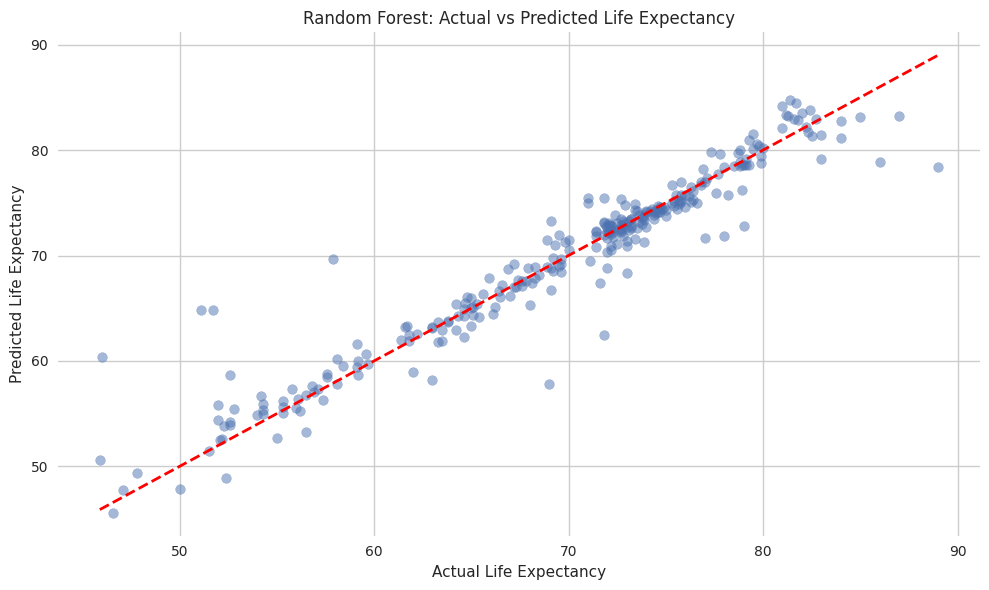

In [53]:


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Random Forest: Actual vs Predicted Life Expectancy")
plt.tight_layout()
plt.show()


#### Implementing the Feed forward Neural Network

 BMI                               0
GDP                                0
Income composition of resources    0
Status_encoded                     0
Country_Afghanistan                0
                                  ..
Country_Uruguay                    0
Country_Uzbekistan                 0
Country_Vanuatu                    0
Country_Zambia                     0
Country_Zimbabwe                   0
Length: 137, dtype: int64
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4647.5454 - mae: 67.5833 - val_loss: 4157.1426 - val_mae: 63.8059
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3952.4595 - mae: 62.1460 - val_loss: 3089.5144 - val_mae: 54.7361
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2666.1484 - mae: 50.5790 - val_loss: 1656.0245 - val_mae: 39.4012
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1200.6711 - mae: 32.7852 - val_loss: 470.0188 - val_mae: 19.2966
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307.2426 

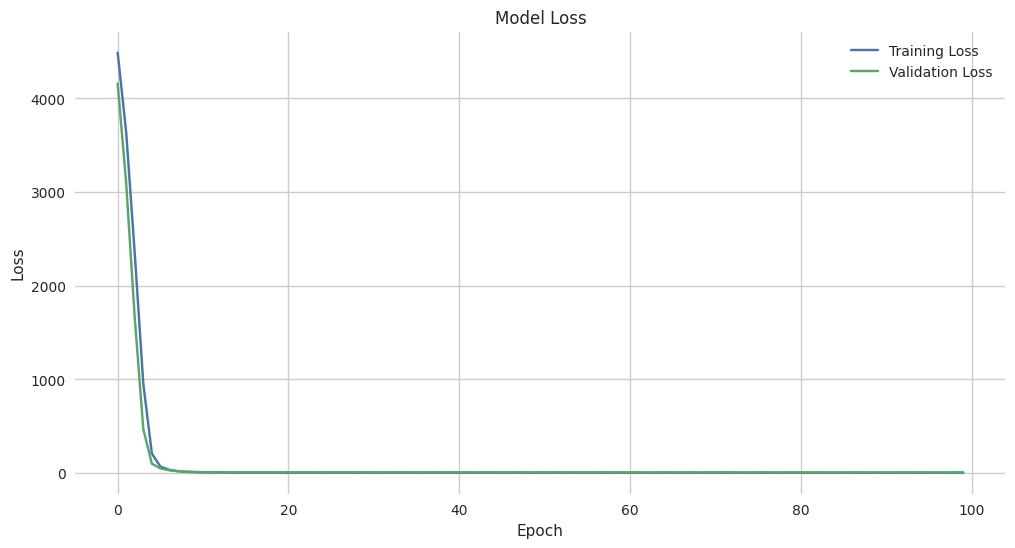

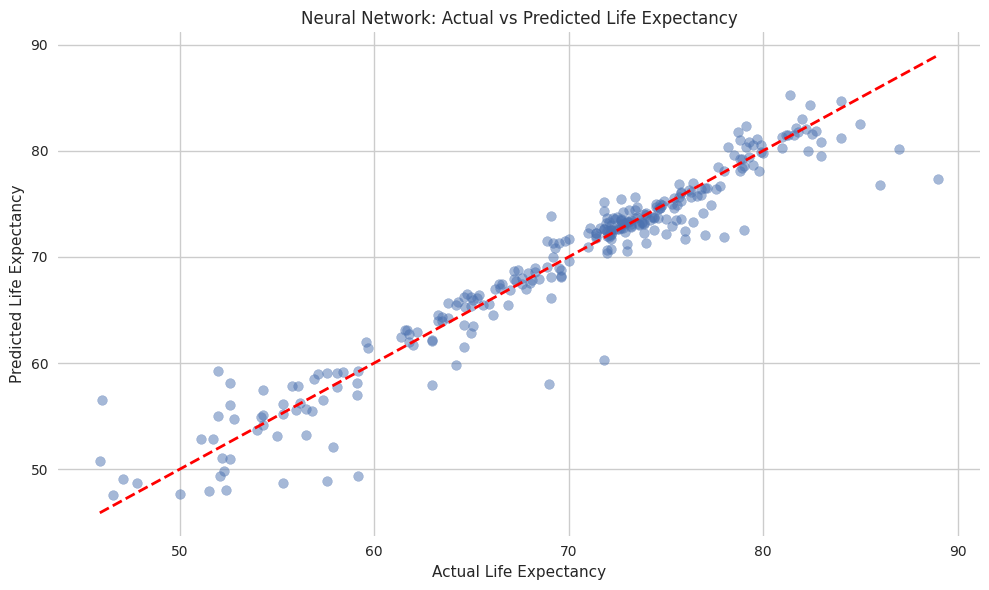

In [54]:
print(X.isnull().sum())
X.fillna(X.mean(), inplace=True)


#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Building the Neural Network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Feed Forward Neural Network: Actual vs Predicted Life Expectancy")
plt.tight_layout()
plt.show()


##### Here the feed forward neural network tends to be the more efficient model as there is a better RMSE value removing the possibility of larger errors and overfitting.


### Model Evaluation


In [55]:
#Implementing the cross validation
#Cross validation for Random Forest regressor
number_of_folds = 10
kfold = KFold(n_splits=number_of_folds,shuffle=True, random_state=42)


In [56]:
#Cross validation for Random Forest regressor
cross_validation_random_forest = cross_val_score(rf_model,X,y,cv=number_of_folds)
print(f'Cross-Validation Results (Accuracy): {cross_validation_random_forest}')
print(f'Mean Accuracy: {cross_validation_random_forest.mean()}')

Cross-Validation Results (Accuracy): [0.81511696 0.58122974 0.83325319 0.78293243 0.56995085 0.76992833
 0.75469253 0.48618947 0.64717069 0.62872271]
Mean Accuracy: 0.6869186884624853
